In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [131]:
full_df = pd.read_csv(open("/Users/RyanHaver/Projects/cryptoStrategies/full_data.csv"))
full_df.drop(columns=['open_time', 'close_time', 'count', 'taker_buy_base_volume', 'taker_buy_quote_volume'], inplace=True)
full_df.head()

,open,high,low,close,volume,quote_volume
0,8548.70,8637.76,8548.70,8628.42,0.202100,1737.6142
1,8638.78,8646.56,8625.83,8625.83,0.018900,163.1756
2,8588.22,8591.65,8588.22,8591.65,0.033354,286.5019
3,8605.05,8631.37,8595.12,8631.37,0.521172,4490.0216
4,8631.37,8631.37,8631.37,8631.37,0.000000,0.0000


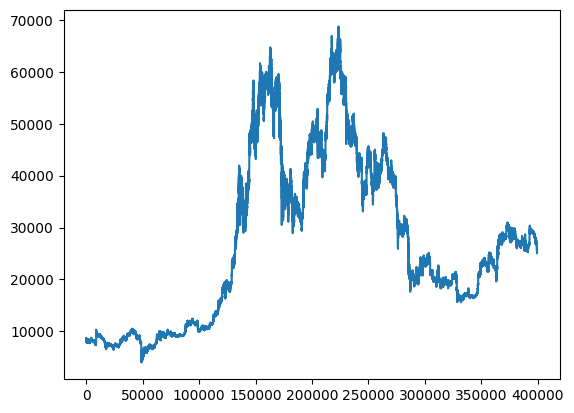

In [92]:
plt.plot(full_df['close'].to_list())
plt.show()

In [134]:
window_size = 5
# Does using open and close prices actually give me any more information?
full_df['close_change'] = full_df['close'].diff()
full_df['open_change'] = full_df['open'].diff()
full_df['positive_close'] = full_df['close_change'] > 0
full_df['positive_open'] = full_df['open_change'] > 0
close_previous_window = full_df['positive_close'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
close_next_window = full_df['positive_close'].rolling(window=window_size, min_periods=window_size).sum().shift(window_size) == window_size
open_previous_window = full_df['positive_open'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
open_next_window = full_df['positive_open'].rolling(window=window_size, min_periods=window_size).sum().shift(window_size) == window_size
full_df['trend_close'] = close_previous_window & close_next_window
full_df['trend_open'] = open_previous_window * open_next_window
full_df.reset_index(inplace=True)
full_df

,level_0,index,open,high,low,close,volume,quote_volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open
0,0,0,8548.70,8637.76,8548.70,8628.42,0.202100,1737.614200,NaN,NaN,False,False,False,False
1,1,1,8638.78,8646.56,8625.83,8625.83,0.018900,163.175600,-2.59,90.08,False,True,False,False
2,2,2,8588.22,8591.65,8588.22,8591.65,0.033354,286.501900,-34.18,-50.56,False,False,False,False
3,3,3,8605.05,8631.37,8595.12,8631.37,0.521172,4490.021600,39.72,16.83,True,True,False,False
4,4,4,8631.37,8631.37,8631.37,8631.37,0.000000,0.000000,0.00,26.32,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399248,399248,31,25301.01,25468.59,25101.01,25101.01,2.758760,69555.219855,-200.00,-198.99,False,False,False,False
399249,399249,32,25101.01,26459.02,25001.00,25196.00,6.245420,158555.791356,94.99,-200.00,True,False,False,False
399250,399250,33,25241.24,25493.65,25001.02,25115.01,2.081300,52313.419493,-80.99,140.23,False,True,False,False
399251,399251,34,25199.29,25241.24,25000.00,25025.00,2.830070,70992.712009,-90.01,-41.95,False,False,False,False


Text(0.5, 1.0, 'Values with Uptrends Highlighted')

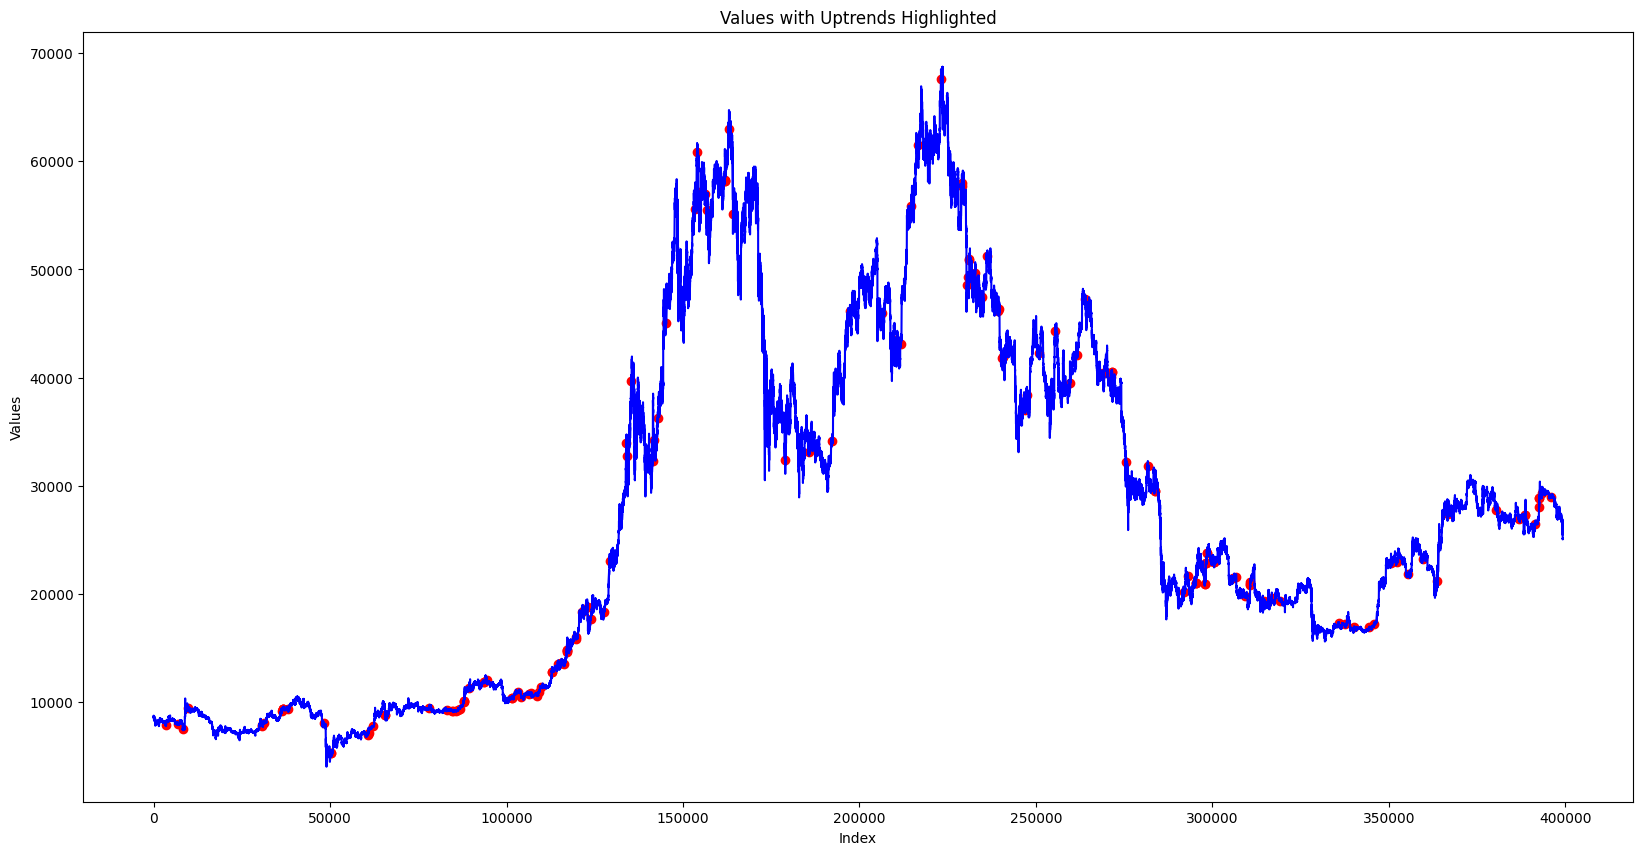

In [135]:
# Plot the entire series
plt.figure(figsize=(20,10))
plt.plot(full_df['close'], label='Values', color='blue')
# Overlay uptrends in a different color
uptrend_indices = full_df[full_df['trend_close'] == True].index
plt.scatter(uptrend_indices, full_df['close'].loc[uptrend_indices], color='red', label='Uptrend')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values with Uptrends Highlighted')
